# Diferentes cadenas de Markov y diferentes cantidades

Todos los problemas se preguntan para las siguientes cadenas de Markov:

- Ruina del jugador
- Caminata aleatoria
- Crecimiento poblacional
- Urna de Ehrenfest

In [46]:
from tqdm.notebook import tqdm as tqm
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np

# Opciones de matplotlib
rc=plt.rcParams
rc['figure.figsize']=[15,5]

# Para mostrar todas las columnas cuando se imprime un df
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

## 1. Simulacion de las cadenas



## 1.2 Probabilidad de transición

Para cada una de las cadenas previamente mencionadas, crea la función de transición; es decir aquella que nos da la probabilidad de pasar del estado $i$ al $j$. También puede servir definir funciones que creen las matrices de transición (para casos finitos)

Desde la perspectiva del Casino la persona puede tener una cantidad de dinero iniciale entre 0 y $d$.

La matriz de transición está dada por

$$
P_{ij}=\begin{pmatrix}
1 & 0 & 0 & \cdots & 0 \\
1-p & 0 & p & \cdots & 0 \\
0 & 1-p & 0 & \ddots & 0 \\
\vdots & \ddots & \ddots & \ddots & p \\
0 & \cdots & 0 & 0 & 1
\end{pmatrix}
$$


In [47]:
# Ruina del jugador
import numpy as np

def gen_matriz(N, p):
    # Inicializa una matriz de (N+1) x (N+1) llena de ceros
    matrix = np.zeros((N+1, N+1))

    # Estados absorbentes
    matrix[0, 0] = 1
    matrix[N, N] = 1

    # Rellenamos los elementos a cada lado de la diagonal
    for i in range(1, N):
        matrix[i, i-1] = 1 - p  # Probabilidad de perder
        matrix[i, i+1] = p  # Probabilidad de ganar

    return matrix

# Parámetros del problema
N = 10  # Dinero máximo, Tamaño de la matriz
p = 0.6  # Probabilidad de ganar

Pij = gen_matriz(N, p)
print(Pij)


[[1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.4 0.  0.6 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.4 0.  0.6 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.4 0.  0.6 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.4 0.  0.6 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.4 0.  0.6 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.4 0.  0.6 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.4 0.  0.6 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.4 0.  0.6 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.4 0.  0.6]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. ]]


esta representación es ineficiente porque guarda muchos ceros iguales. No importa por lo pronto, pero podría en el futuro dependiendo de lo que hagan.

### 1.1 Simulación paso a paso

Para cada una de las cadenas previamente mencionadas, crea una función que dado un vector de probabilidades $\pi_{n}$ regresen la distribución de probabilidades en el siguiente paso $\pi_{n+1}$. Para la caminata aleatoria pueden obviar este paso

Supongamos que la mayoría de las personas tienen una alta probabilidad de llegar con poco dinero. Vamos a hacer una distribución exponencial para iniciar

In [48]:
pi_0=np.zeros(N+1)
pi_0[1:-1]=np.exp(-np.arange(1,N))
pi_0

array([0.00000000e+00, 3.67879441e-01, 1.35335283e-01, 4.97870684e-02,
       1.83156389e-02, 6.73794700e-03, 2.47875218e-03, 9.11881966e-04,
       3.35462628e-04, 1.23409804e-04, 0.00000000e+00])

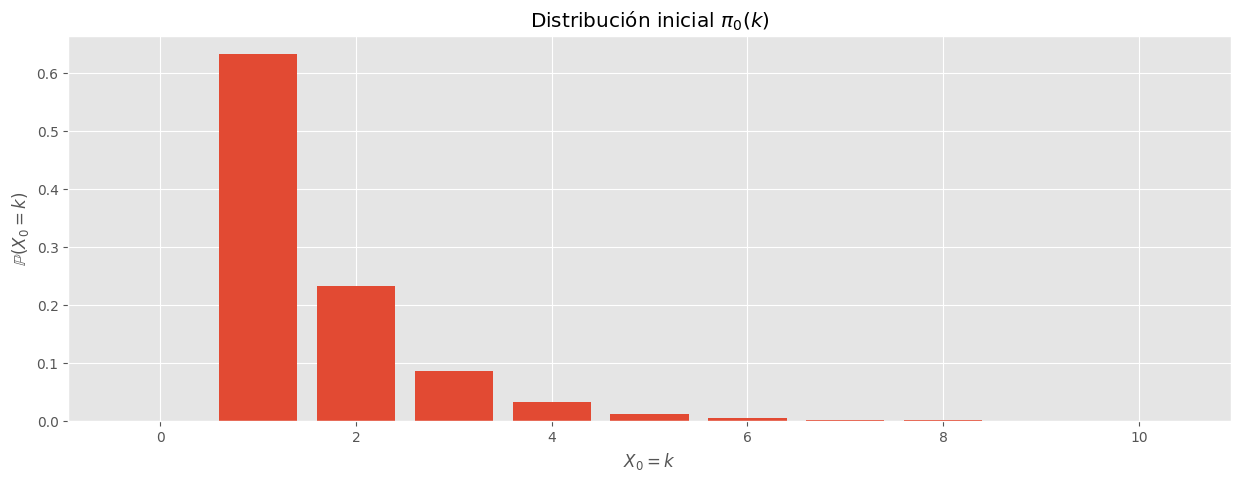

In [49]:
pi_0=np.zeros(N+1)
pi_0[1:-1]=np.exp(-np.arange(1,N)) # Primero hacemos una exponencial
pi_0=pi_0/pi_0.sum() # Luego normalizamos la distribución

# Agregamos el elemento 0 y el N
pi_0


plt.bar(np.arange(N+1),pi_0)
# plt.plot(np.linspace(1,N+1,100),np.exp(-np.linspace(1,N+1,100)),c='b')
plt.xlabel('$X_0=k$')
plt.ylabel('$\\mathbb{P}(X_0=k)$')
plt.title('Distribución inicial $\\pi_0(k)$')
plt.show()

De acuerdo a la teoría que hemos visto para conseguir la distribución de probabilidad de $X_1$ como  lo haríamos

$$\pi_1=\pi_0\cdot P $$

en numpy esto corresponde al producto punto denotado con @

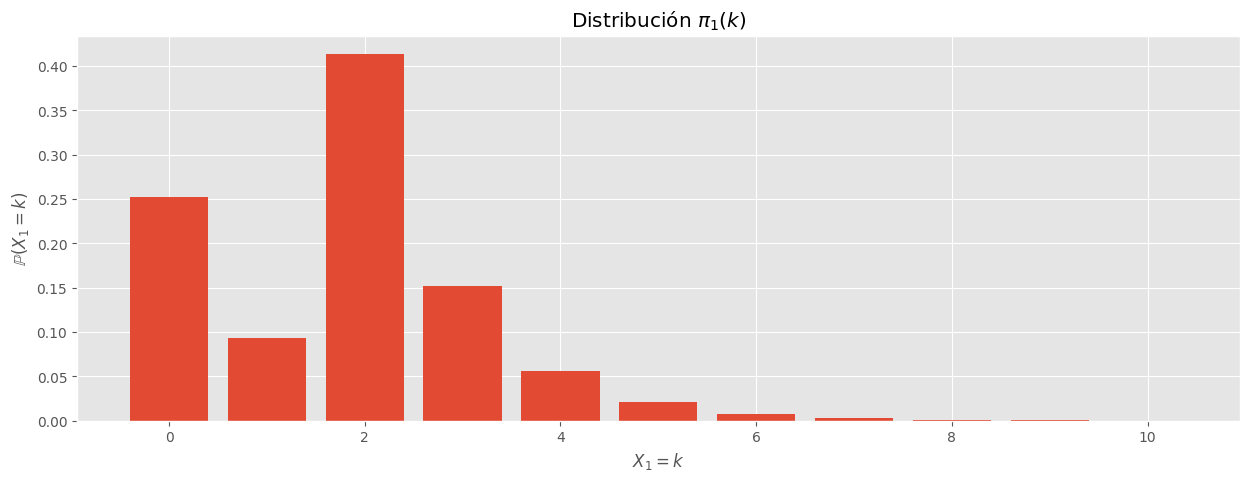

In [50]:
pi_1=pi_0@Pij #notación de np para producto matricial
plt.bar(np.arange(N+1),pi_1)
plt.xlabel('$X_1=k$')
plt.ylabel('$\\mathbb{P}(X_1=k)$')
plt.title('Distribución $\\pi_1(k)$')
plt.show()

In [51]:
pi_1.sum()

1.0

## 1.3 Simulación de variables aleatorias

Crear una función que dado un arreglo de estocástico simule una variable aleatoria de la función condicional

In [52]:
# Esto ya lo hemos visto previamente. Tenemos un arreglo de probabilidades y queremos simular de él


def simula_dado_pi(pi):
    # Primero simulamos uniforme
    u=np.random.random()
    # print(u)
    # después vemos en que cubeta cae y devolvemos esa variable aleatoria
    mask=u < pi.cumsum()
    
    var_aleatoria=mask.argmax()
    return var_aleatoria

simula_dado_pi(pi_1)

[2.52879431e-01 9.30291439e-02 4.13542656e-01 1.52133841e-01
 5.59669125e-02 2.05890765e-02 7.57429796e-03 2.78642850e-03
 1.02506976e-03 3.45894289e-04 1.27247398e-04]
[0.25287943 0.34590858 0.75945123 0.91158507 0.96755199 0.98814106
 0.99571536 0.99850179 0.99952686 0.99987275 1.        ]


0

## 1.4 Simulación de la cadena

Tomando todas las funciones de pasos previos crea una función que simule toda la trayectoria de la cadena.

Para simular la cadena, lo queremos hacer teniendo una trayectoria fija, no con distribuciones de probabilidad. Esto significa que en cada paso haremos lo siguiente

1. Comenzamos con la distribución $\pi_0$. 
2. Simulamos una variable aleatoria de esta distribución. Este será el valor de $X_0$. Podemos ver a esta simulación como un vector con un uno en la entrada del valor que simulamos y cero en las demás. Así, si por ejemplo $X_0=0$, redefinimos $\pi_0=(1,0,\ldots,0)$ y de esta manera podemos seguir usando las matrices de transición.
3. Después repetimos lo siguiente para todos los valores que tengamos
    1. Usamos las funciones de transición para obtener un vector de probabilidades $\pi_n=\pi_{n-1} P_{ij}$ 
    2. Simulamos de esta distribución $\pi_n$ una variable aleatoria y actualizamos el valor de $\pi_n$ con un uno en la posición del valor y 0 en las demás entradas.


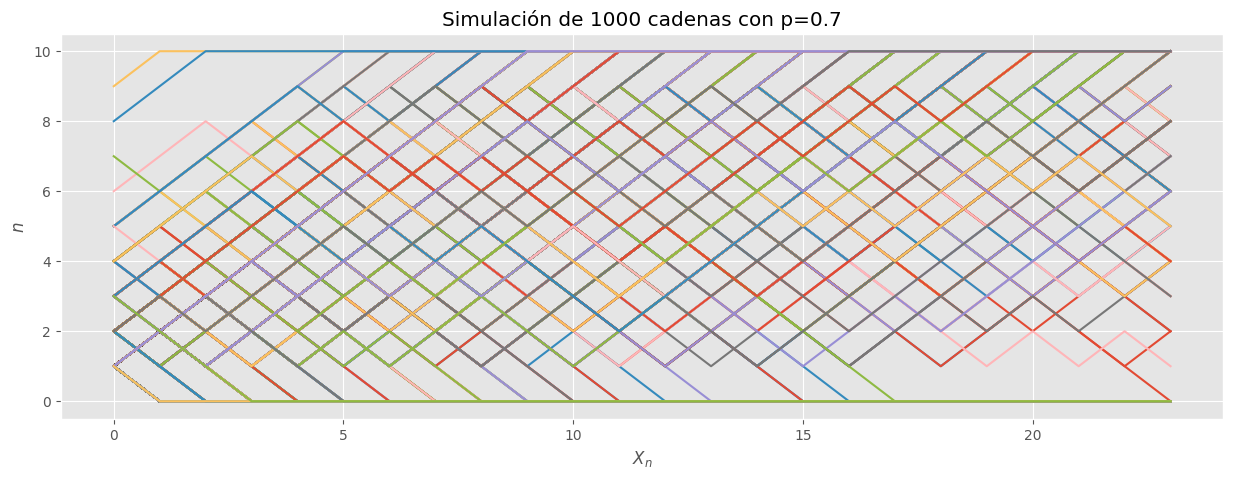

In [53]:
# Sólo hay que llamar los pasos previos una y otra vez

def cadena_jugador(long_cadena,pi_0,p=0.5):
    # Generamos la matriz de transiciones
    Pij = gen_matriz(N, p)

    pi=pi_0
    Xn=[]

    for i in range(long_cadena):
        # Simulamos de la distribución pi_i
        Xi=simula_dado_pi(pi)
        # Inicializamos un vector de probabilidad que tiene ceros en todas las coordenadas
        pi=np.zeros(N+1)
        # Ponemos el índice de la simulación en 1. Para tener un vector de probabilidades que siempre cae en Xi
        pi[Xi]=1
        # Actualizamos la probabilidad de caer en el siguient estado
        pi=pi@Pij
        # Guardamos el valor en una lista
        Xn.append(Xi)

    return Xn

n=23 # punto de la cadena donde nos concentramos
long_cadena=n+1 # Hacemos la cadena uno más grande
N_cadenas=1_000 # Simulamos mil cadenas de Markov
p=0.7 # La probabilidad de ganar es de 0.7

lista_cadenas=[] # Almacenamos todas las cadenas

# Simulamos muchas cadenas y las agregamos a la lista
for i in range(N_cadenas):
    Xn=cadena_jugador(long_cadena,pi_0,p)
    lista_cadenas.append(Xn)
    plt.plot(Xn)    # graficamos la cadena

plt.title(f'Simulación de {N_cadenas} cadenas con p={p}')
plt.xlabel('$X_n$')
plt.ylabel('$n$')
plt.show()

Ahora mostraremos que la distribución que obtenemos de forma general para $X_n$ usando la matriz de transición es la misma que la que obtenemos al generar $N$ cadenas y fijarnos en su elemento $n$. Esto es sólo para confirmar que nuestro formalismo es correcto. Es decir, si fijamos $n$ y simulamos $N$ cadenas deberíamos de tener algo muy parecido (ya que vienen de la misma distribución) a primero calcular la distribución de $X_n$ haciendo $\pi_n=\pi_0 P^n$. y simulando $N$ variables de ahí.

En la siguiente celda mostraremos el histograma de ambas partes

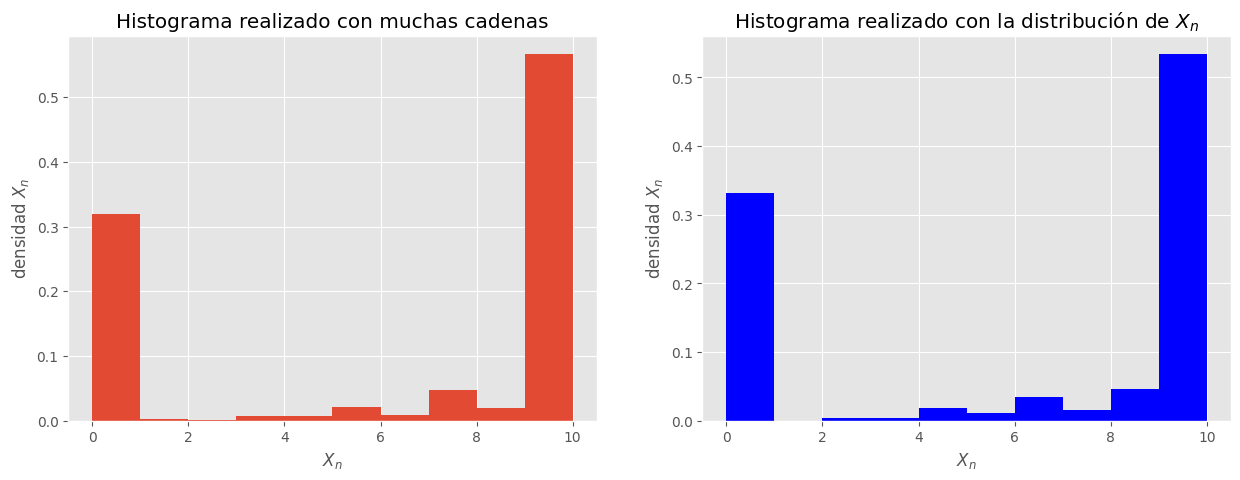

In [54]:
# hacemos un arreglo de todas las cadenas, es de 200x100 porque simulamos 200 cadenas de tamaño 100 cada una.
arreglo_cadenas=np.array(lista_cadenas)
# Para obtener muestras de la distribución en el paso n obtenemos la columna n del arreglo_cadenas
Xn_cadenas=arreglo_cadenas[:,n-1] # Que quiere decir toma todos los renglones (la primera parte del corchete) de la columna n (la segunda parte)


# Ahora simulamos de la distribución de pi_n
def P_n(Pij,n):
    '''Función que eleva una matriz a la n'''
    P=Pij.copy()
    for _ in range(n-1):
        P=P@Pij
    return P 

Pij=gen_matriz(N=N,p=p)
Pij_n=P_n(Pij,n)

pi_n=pi_0@Pij_n

sim_segundo_metodo=[]
for i in range(N_cadenas):
    sim_segundo_metodo.append(simula_dado_pi(pi_n))
    
fig,ax=plt.subplots(nrows=1,ncols=2)
ax[0].hist(Xn_cadenas,density=True)
ax[0].set_title('Histograma realizado con muchas cadenas'); ax[0].set_xlabel('$X_n$'); ax[0].set_ylabel('densidad $X_n$')

ax[1].hist(sim_segundo_metodo,density=True,color='blue'); ax[1].set_xlabel('$X_n$'); ax[1].set_ylabel('densidad $X_n$')
ax[1].set_title('Histograma realizado con la distribución de $X_n$') ; plt.show()

Podemos ver que ambas son muy similares (no iguales porque es un fenómeno aleatorio) 

# 2. Estimaciones de cantidades aleatorias

## ¿Cómo harías para ver si un estado es recurrente, transitivo o absorbente si no puedes simular infinitamente?

Como vimos en las notas, un estado recurrente pasará una cantidad infinidad de veces, mientras que para los transitivos pasa un número finito de veces. Así, podemos ir estimando el 

$$G(x,y)=\mathbb{E}\left[ N_y \right]$$

que es finito para un estado transitivo e infinito para uno recurrente. Para un estado absorbente, sólo tendríamos que ver que se queda ahí una cantidad de tiempo constante. Para normalizar podemos dividir entre la longitud de la cadena y así, para estados recurrentes tenderá a 1, mientras que para transitivos tenderá a cero. Como estamos simulando una cantidad finita tendremos que definir un umbral para tomar nuestra decisión.

Hay que verlo en diferentes cadenas porque si existen varios estados absorbentes no podríamos asegurar que uno no lo es sólo porque se queda en uno

$\frac{\sqrt{n}}{n}=\frac{1}{\sqrt{n}}$

Estado 10 es transitivo bajo el umbral 0.1


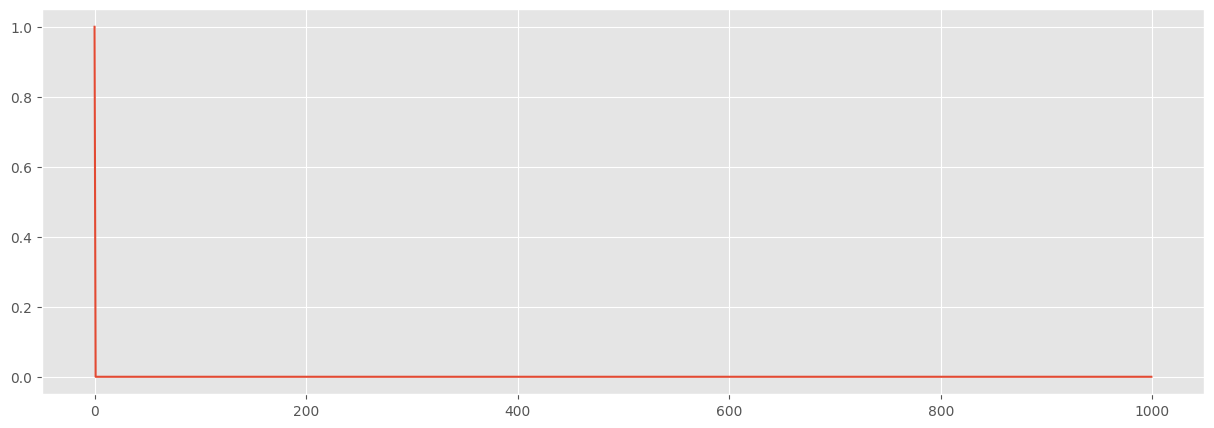

In [55]:
def tipo_estado(estado,pi_0,p,umbral_recurrente=0.1,umbral_transitivo=0.1,umbral_absorbente=0.1,N_max=1_000,imprimir=True):

    cadena=np.array(cadena_jugador(long_cadena=N_max,pi_0=pi_0,p=p))
    
    mask_estado= cadena==estado 
    razon_cuenta= mask_estado.cumsum()/np.arange(1,N_max+1)

    if razon_cuenta[-1]<umbral_transitivo:
        if imprimir:
            print(f'Estado {estado} es transitivo bajo el umbral {umbral_transitivo}')
        return 'transitivo',cadena, razon_cuenta

    elif razon_cuenta[-1]>1-umbral_recurrente:
        
        ultimos_N=int(umbral_absorbente*N_max)

        if mask_estado[-ultimos_N:].sum()>(ultimos_N-1):
            if imprimir:
                print(f'Estado {estado} es absorbente bajo el umbral {umbral_absorbente}')
            return 'absorbente',cadena, razon_cuenta
            
        if imprimir:
            print(f'Estado {estado} es recurrente bajo el umbral {umbral_recurrente}')

        return 'recurrente',cadena, razon_cuenta
    else:
        if imprimir:
            print(f'No se pudo decidir si el estado es recurrente o transitivo con una cadena de longitud {N_max} y umbral recurrente {umbral_recurrente}, umbral transitivo {umbral_transitivo}')

    

        
tipo, cadena, razon= tipo_estado(estado=10,pi_0=pi_0,p=0.6)

plt.plot(cadena);plt.show()
          
          

Desarrolla alguna visualización que nos pueda decir si un estado es recurrente, transitivo, etc.

Visualización de proporción de tipos

  0%|          | 0/100 [00:00<?, ?it/s]

Text(0, 0.5, 'Frecuencia')

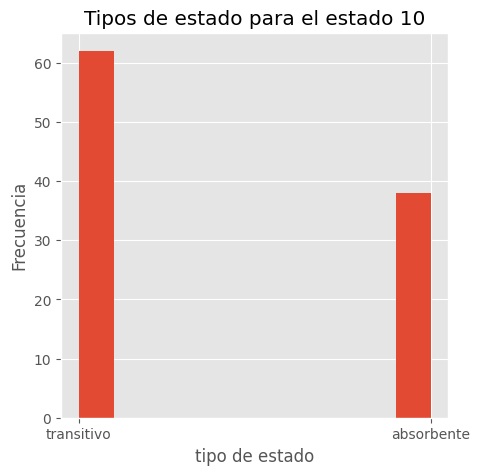

In [56]:
N_simul=100

tipos=[]
estado=10
for i in tqm(range(N_simul)):
    tipo, cadena, razon= tipo_estado(estado=estado,pi_0=pi_0,p=0.6,imprimir=False)
    tipos.append(tipo)

plt.figure(figsize=(5,5))
plt.hist(tipos)
plt.title(f'Tipos de estado para el estado {estado}');plt.xlabel('tipo de estado');plt.ylabel('Frecuencia')

## Desarrolla una función que estime el tiempo de llegada dados dos estados.

Con dos estados hacemos muchas simulaciones y vamos contando el tiempo entre cada ocurrencia. Si el proceso es estacionario no tendría que importar empezar en cada posición de la cadena

In [57]:
def T_x_y(x,y,N_sims,N_cadenas,N,p):
    # Si no llega en N_sims podrías decir que es infinito

    # Una cadena que empiece en x y se ejecute hasta que llegue a y o hasta terminar y simulaciones

    Pij = gen_matriz(N, p)

    T_llegada=[]
    for _ in range(N_cadenas):
        i=0
        Xi=x

        # Ponemos el estado inicial como el de ceros que inicia en x
        pi_0=np.zeros(N+1)
        pi_0[x]=1

        pi=pi_0
        while i<N_sims and Xi!=y:
            i+=1 #i=i+1
            # Simulamos de la distribución pi_i
            Xi=simula_dado_pi(pi)
            # Inicializamos un vector de probabilidad que tiene ceros en todas las coordenadas
            pi=np.zeros(N+1)
            # Ponemos el índice de la simulación en 1. Para tener un vector de probabilidades que siempre cae en Xi
            pi[Xi]=1
            # Actualizamos la probabilidad de caer en el siguient estado
            pi=pi@Pij
            # Guardamos el valor en una lista

      
        T_llegada.append(i)
    
    return T_llegada 

T_llegada=T_x_y(x=3,y=4,N_sims=100,N_cadenas=1_000,N=N,p=p)


In [58]:
T_llegada

[2,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 2,
 2,
 2,
 8,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 10,
 2,
 4,
 4,
 2,
 100,
 2,
 100,
 16,
 2,
 2,
 2,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 6,
 2,
 2,
 8,
 2,
 2,
 2,
 2,
 2,
 2,
 6,
 8,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 100,
 2,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 100,
 2,
 4,
 2,
 2,
 2,
 8,
 6,
 12,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 6,
 2,
 2,
 2,
 2,
 12,
 4,
 2,
 2,
 4,
 2,
 100,
 2,
 4,
 2,
 4,
 6,
 2,
 100,
 2,
 2,
 2,
 2,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 100,
 2,
 2,
 4,
 2,
 2,
 6,
 2,
 2,
 2,
 6,
 2,
 2,
 2,
 2,
 4,
 2,
 6,
 2,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 8,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 4,
 2,
 6,
 2,
 2,
 2,
 100,
 4,
 4,
 6,
 2,
 2,
 2,
 10,
 2,
 2,
 2,
 2,
 4,
 2,
 4,
 2,
 2,
 2,
 2,
 2,
 8,
 2,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 10,
 6,
 4,
 2,
 6,
 2,
 2,
 2,
 4,
 4,
 2,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 6,
 2,
 2,
 4,
 2,
 2,
 4,
 2,
 2,
 4

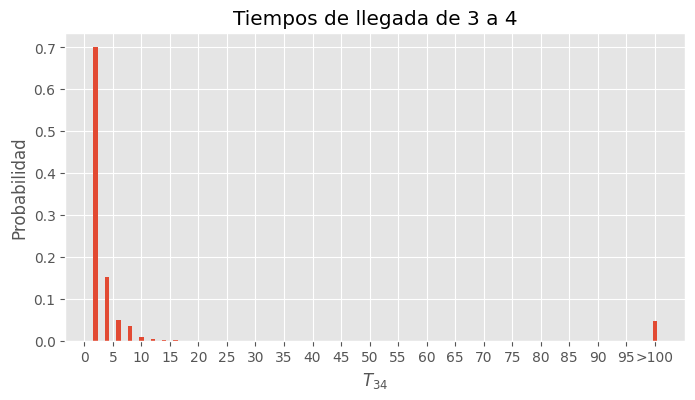

In [59]:
barras=pd.value_counts(T_llegada)
plt.figure(figsize=(8,4))
plt.bar(x=barras.index,height=barras.values/barras.values.sum())
plt.xticks(ticks=np.arange(0,101,5),labels=[f'{i}' for i in range(0,100,5)]+['>100']);
plt.xlabel('$T_{34}$'); plt.ylabel('Probabilidad'); plt.title('Tiempos de llegada de 3 a 4');


## Desarrolla una función que diga si dos  estados son parte de la misma clase de comunicación. 

Hacemos muchas simulaciones empezando en uno hasta llegar al otro, hacemos muchas simulaciones en el otro hasta llegar al primero. 

In [60]:
# Si el tiempo de llegada no es infinito para todos entonces uno accede a otro

def accede(x,y,N_sims,N_cadenas,N,p):
    T_llegada=np.array(T_x_y(x,y,N_sims,N_cadenas,N,p))

    if (T_llegada<N_sims).any():
        return True
    
    return False

def comunica(x,y,N_sims,N_cadenas,N,p):
    if accede(x,y,N_sims,N_cadenas,N,p) and accede(y,x,N_sims,N_cadenas,N,p):
        return True 
    
    return False


Puedes calcular alguna cantidad interesante de las cadenas aleatorias? Por ejemplo, las personas promedio que se van a la quiebra o ganan?

Veamos para que valor de $p$ podemos mantener a las personas mucho en un casino dada la distribución inicial.

In [61]:
p_array=np.linspace(0.01,0.99,100)

t_paro_promedio=[]
N_cadenas=1_000
l_cadena=30

for pi in p_array:
    t_paro_pi=[]
    for _ in range(N_cadenas):
        cadena=cadena_jugador(long_cadena=l_cadena,pi_0=pi_0,p=pi)
        if 10 in cadena:
            idx_paro=cadena.index(10)
        elif 0 in cadena:
            idx_paro=cadena.index(0)
        else:
            idx_paro=l_cadena
        t_paro_pi.append(idx_paro)
    t_paro_promedio.append(np.mean(t_paro_pi))

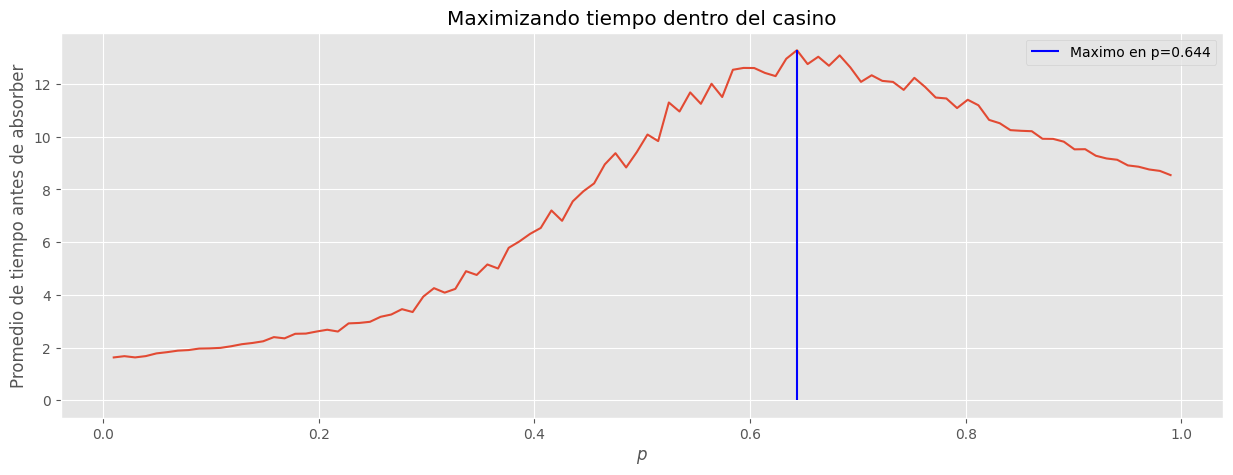

In [62]:
plt.plot(p_array,t_paro_promedio)
plt.vlines(x=p_array[np.argmax(t_paro_promedio)],ymin=0,ymax=np.max(t_paro_promedio),colors='blue',label=f'Maximo en p={p_array[np.argmax(t_paro_promedio)]:3.3f}')
plt.title('Maximizando tiempo dentro del casino')
plt.xlabel('$p$'); plt.ylabel('Promedio de tiempo antes de absorber'); plt.legend();